In [3]:
import numpy as np
import pandas as pd

In [4]:
df_sachin = pd.read_csv("sachin_odi.csv")

In [5]:
df_sachin.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Century,Won
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,No,No
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,No,No
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,No,Yes
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,No,Yes
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,No,No


In [6]:
df_sachin.shape

(360, 14)

## What is the probability of winning? $P[W]$

There are 360 matches, in how many has India won?

In [7]:
df_sachin["Won"].value_counts()

Yes    184
No     176
Name: Won, dtype: int64

Prob of winning is 184/(184 + 176)

In [8]:
184/(184 + 176)

0.5111111111111111

In [9]:
df_won = df_sachin[df_sachin["Won"]=="Yes"]

In [10]:
len(df_won)

184

In [11]:
prob_winning = len(df_won) / len(df_sachin)
prob_winning

0.5111111111111111

## What is the probability of Sachin scoring century? $P[C]$

In [12]:
df_sachin["Century"].value_counts()

No     314
Yes     46
Name: Century, dtype: int64

Probability of scoring a century is 46 / ( 314 + 46)

In [13]:
46 / (314 + 46)

0.12777777777777777

In [14]:
df_century = df_sachin[df_sachin["Century"]=="Yes"]
len(df_century)

46

In [15]:
prob_century = len(df_century) / len(df_sachin)
prob_century

0.12777777777777777

## Winning AND Century $P[W \cap C]$

We want to compute the probability of Sachin scoring a century AND India winning.
This is called **Joint** probability. Another important terminology is **Intersection**.

Let us see the `value_counts` of the columns "Won" and "century"

In [16]:
df_sachin[["Century", "Won"]].value_counts()

Century  Won
No       No     160
         Yes    154
Yes      Yes     30
         No      16
dtype: int64

In [17]:
pd.crosstab(index=df_sachin["Century"], columns=df_sachin["Won"])

Won,No,Yes
Century,,
No,160,154
Yes,16,30


In [18]:
# pd.crosstab(index = df_sachin["Century"], columns = df_sachin["Won"], margins = True)

This table is called the **contingency table**

The `crosstab` method also allows us to see the total in each row and column using the key word argument *margins*

In [19]:
pd.crosstab(index=df_sachin["Century"], columns=df_sachin["Won"], margins=True)

Won,No,Yes,All
Century,,,
No,160,154,314
Yes,16,30,46
All,176,184,360


From the contingency table, we see that there are 30 matches where Sachin has scored a century and India has won. So the probability of century AND winning is 30/360

In [20]:
30 / 360

0.08333333333333333

Let us do the same using Pandas

In [21]:
df_win_and_century = df_sachin[(df_sachin["Century"] == "Yes") & (df_sachin["Won"] == "Yes")]
len(df_win_and_century)

30

Finally, to compute the probability, we divide by total number of matches

In [22]:
prob_win_and_century = len(df_win_and_century) / len(df_sachin)
prob_win_and_century

0.08333333333333333

Mathematically, we write this as 
\begin{align}
P[W \cap C] = \frac{30}{360}
\end{align}

This is known as **intersection** or **joint probability**

In [23]:
pd.crosstab(index=df_sachin["Century"], columns=df_sachin["Won"], margins=True)

Won,No,Yes,All
Century,,,
No,160,154,314
Yes,16,30,46
All,176,184,360


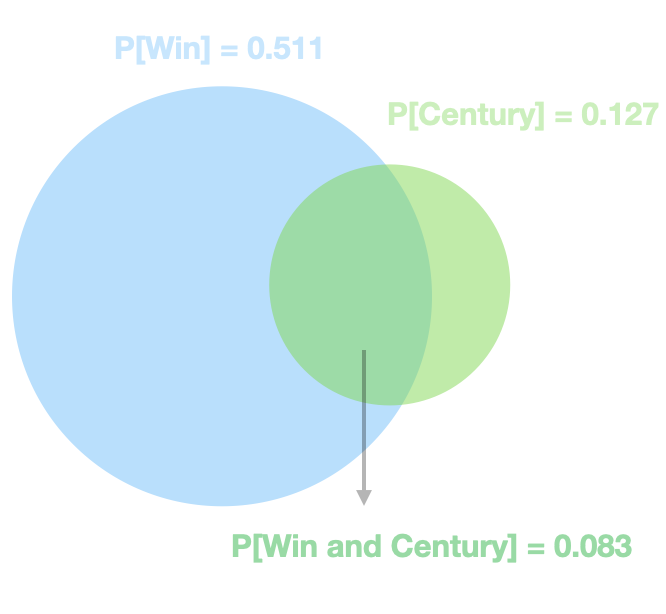

We can also compute the probability of winning and Sachin not scoring century

In [24]:
df_win_and_not_century = df_sachin[(df_sachin["Century"] == "Yes") & (df_sachin["Won"] == "No")]
len(df_win_and_not_century)

16

In [25]:
len(df_win_and_not_century)/len(df_sachin)

0.044444444444444446

## Winning given that Sachin scored a century: $P[W|C]$

Among the matches in which Sachin has scored century, what is the probability of India winning?

In [30]:
df_century = df_sachin[df_sachin["Century"]=="Yes"]
len(df_century)

46

Among the 46 matches that Sachin has scored century, in how many have india won?

In [32]:
df_win_given_century = df_century[df_century['Won']=="Yes"] # Courtesy Ashish Rathore
len(df_win_given_century)

30

In [33]:
prob_winning_given_century = len(df_win_given_century) / len(df_century)
prob_winning_given_century

0.6521739130434783

In [34]:
30 / 46

0.6521739130434783

##### Verify using intersection:

P(A|B) = P(A^B)/P(A)

In [48]:
prob_win_and_century / prob_century

0.6521739130434783

**Conditional Probability**

P(win | century)

The event after the vertical bar (century) has happened. Now, what is the probability of winning

## Probability of century given that India won: $P[C|W]$


In [37]:
pd.crosstab(index=df_sachin["Century"], columns=df_sachin["Won"], margins=True)

Won,No,Yes,All
Century,,,
No,160,154,314
Yes,16,30,46
All,176,184,360


Among the matches that India has won, in how many matches has Sachin scored century

P(century | win)

In [42]:
df_century_given_win = df_won[df_won["Century"]=="Yes"]

In [43]:
prob_century_given_win = len(df_century_given_win) / len(df_won)
prob_century_given_win

0.16304347826086957

In [44]:
30 / 184

0.16304347826086957